# Introduction to LangGraph

## Let's see how to connect two nodes sequentially into the `StateGraph`
Now, I am a bit clear about setting up a `State Graph` with one *node*. But what if I need a *graph* with multiple nodes in it. How does that work? how differently can I connect the *nodes* to each other. All these interesting questions came to my mind. So I started to explore again. The most basic *multi node graph* will have two *nodes*. When you have two *nodes* the most basic was to connect them is to connect each other with a single *edge (connection)*. That's it. 

Let's see how I can do that now. Now, when I have two *nodes* that means I need two *node functions*. Let's start to build this *graph*. 

So simple steps would be as follows: 
+ Import the *python modules*
+ Define the `AgentState` variable with a *State Schemaa*
+ Define the *node function* for the first *node*. Let me call it `node1`
+ Define the *node function* for the second *node*. Let me call it `node2`
+ Create an instance of a `StateGraph` let me call it `graph`
+ Adding the nodes to the `graph`
+ Adding the `entry_point` and 'finish_point` of the `graph`
+ Compile the `graph`
+ visualize the compiled `graph`

In [1]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict
# Defining a state schema for the agent
class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

# Defining a greeting node 
def node1(input_check) -> None:
    """Simple node that greets a user"""
    print(f'Given Input from the Graph: \n{input_check}\n\n')
    print("Hello! Now we are executing the first node of the graph.")

def node2(input_check) -> None:
    """Simple node that asks for the user's name"""
    print(f'Given Input from the Graph: \n{input_check}\n\n')
    print("Now we are executing the second node of the graph.")

graph = StateGraph(AgentState) # Trying to define the StateGraph without a State Schema
graph.add_node("node1", node1)  # Adding the greeting node to the 
graph.add_node("node2", node2)  # Adding the second node to the graph
graph.set_entry_point("node1")  # Setting the entry point to the greeting node : graph.add_edge(START, "greeting")
graph.set_finish_point("node2")  # Setting the finish point to the greeting node : graph.add_edge("greeting", END)

# Compiling the graph
app = graph.compile()


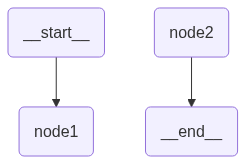

In [2]:
from IPython.display import display, Image 
display( Image(
    app.get_graph().draw_mermaid_png()
))

Well, that didn't work as expected. The `graph` seems to be broken into two parts. That's because there is no connection between `node1` and `node2`. When I explored what I learned was that we can connect two *nodes* with an *edge*. 

Therefore, I need to add another step into the task list. 
+ Import the *python modules*
+ Define the `AgentState` variable with a *State Schemaa*
+ Define the *node function* for the first *node*. Let me call it `node1`
+ Define the *node function* for the second *node*. Let me call it `node2`
+ Add an *edge* between `node1` and `node2`
+ Create an instance of a `StateGraph` let me call it `graph`
+ Adding the nodes to the `graph`
+ Adding the `entry_point` and 'finish_point` of the `graph`
+ Compile the `graph`
+ visualize the compiled `graph`

Let me add that connection now. The full code where I added the *edge* is given below. 

In [5]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict
# Defining a state schema for the agent
class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

# Defining a greeting node 
def node1(input_check) -> None:
    """Simple node that greets a user"""
    print(f'Given Input from the Graph: \n{input_check}\n\n')
    print("Hello! Now we are executing the first node of the graph.")

def node2(input_check) -> None:
    """Simple node that asks for the user's name"""
    print(f'Given Input from the Graph: \n{input_check}\n\n')
    print("Now we are executing the second node of the graph.")

graph = StateGraph(AgentState) # Trying to define the StateGraph without a State Schema
graph.add_node("node1", node1)  # Adding the greeting node to the 
graph.add_node("node2", node2)  # Adding the second node to the graph
graph.add_edge("node1", "node2")  # Adding an edge from the greeting node to the second node
graph.set_entry_point("node1")  # Setting the entry point to the greeting node : graph.add_edge(START, "greeting")
graph.set_finish_point("node2")  # Setting the finish point to the greeting node : graph.add_edge("greeting", END)

# Compiling the graph
app = graph.compile()


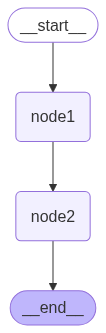

In [6]:
from IPython.display import display, Image 
display( Image(
    app.get_graph().draw_mermaid_png()
))

Now that looks good. That's the structure which I expected to build. Let me now try to run the *graph*. So for that I need to define an input varible. Similar to previous test. Let's try to give an input which is different to the *State Schema* structure. 

In [5]:
input = { 'check_input': 'This is a test input' } # This is not similar to the State Schema defined above

app.invoke(input)  

Given Input from the Graph: 
{}


Hello! Now we are executing the first node of the graph.
Given Input from the Graph: 
{}


Now we are executing the second node of the graph.


In [6]:
input2 = { 'greeting': 'This is a test input' } # This is similar to the State Schema defined above
app.invoke(input2)  # This should work as the input matches the state schema

Given Input from the Graph: 
{'greeting': 'This is a test input'}


Hello! Now we are executing the first node of the graph.
Given Input from the Graph: 
{'greeting': 'This is a test input'}


Now we are executing the second node of the graph.


{'greeting': 'This is a test input'}